In [22]:
# import necessary library and warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set(style='whitegrid', rc= {'figure.figsize':(20, 10)}, palette='muted', color_codes=True)
print('All libraries imported and setting configured.')

All libraries imported and setting configured.


In [23]:
data_path = r'D:\python\amazon_sales_data_2025.csv'
df = pd.read_csv(data_path, encoding="utf-8", delimiter= ',')
print('Dataset is encoded and loaded.')

Dataset is encoded and loaded.


In [24]:
print('Dataset Head:')
display(df.head(10))

Dataset Head:


,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-2025,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-2025,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-2025,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-2025,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-2025,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
5,ORD0006,14-03-2025,T-Shirt,Clothing,20,1,20,John Doe,Dallas,Credit Card,Pending
6,ORD0007,18-03-2025,Smartwatch,Electronics,150,4,600,Emma Clark,Houston,PayPal,Completed
7,ORD0008,02-03-2025,Smartphone,Electronics,500,1,500,Sophia Miller,Miami,PayPal,Completed
8,ORD0009,08-03-2025,T-Shirt,Clothing,20,3,60,Sophia Miller,Boston,PayPal,Completed
9,ORD0010,12-03-2025,Smartphone,Electronics,500,1,500,Emily Johnson,San Francisco,Credit Card,Cancelled


In [25]:
df.shape

(250, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [27]:

missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)
print('We can see there is no missing values in our datset.')

Missing values in each column:
Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64
We can see there is no missing values in our datset.


In [28]:
print('Descriptive Statistics:')
display(df.describe())

Descriptive Statistics:


,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [29]:
print('Renamed some column name for better visualisation.')
df.rename(columns= {'Order ID': 'Order_ID', 'Total Sales':'Total_Sales', 'Customer Name':'Customer_Name', 'Customer Location':'Customer_Location', 'Payment Method':'Payment_Method'})

Renamed some column name for better visualisation.


,Order_ID,Date,Product,Category,Price,Quantity,Total_Sales,Customer_Name,Customer_Location,Payment_Method,Status
0,ORD0001,14-03-2025,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-2025,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-2025,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-2025,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-2025,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-2025,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-2025,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-2025,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-2025,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [30]:
df['Date'] = pd.to_datetime(df['Date'])
print('First date is :', df['Date'].min())
print('Last date is :', df['Date'].max())

First date is : 2025-02-02 00:00:00
Last date is : 2025-04-02 00:00:00


In [45]:
cu_na = df['Customer Name'].value_counts()
display(cu_na.head(1))
display(cu_na.tail(1))
print('Emma Clark have highest involvement with Amazon and Sophia Miller have lowest involvement.')

Customer Name
Emma Clark    32
Name: count, dtype: int64

Customer Name
Sophia Miller    16
Name: count, dtype: int64

Emma Clark have highest involvement with Amazon and Sophia Miller have lowest involvement.


In [32]:
print('Get a knowledge of Category and Product.')
grouped = df.groupby('Category')['Product'].apply(set).reset_index()
display(grouped)

Get a knowledge of Category and Product.


,Category,Product
0,Books,{Book}
1,Clothing,"{Jeans, T-Shirt}"
2,Electronics,"{Smartphone, Laptop, Smartwatch, Headphones}"
3,Footwear,{Running Shoes}
4,Home Appliances,"{Refrigerator, Washing Machine}"


In [33]:
cu_lo = df['Customer Location'].unique()
display(list(cu_lo))
print('Orders are given from', len(cu_lo), 'different city.')

['New York',
 'San Francisco',
 'Denver',
 'Dallas',
 'Houston',
 'Miami',
 'Boston',
 'Seattle',
 'Los Angeles',
 'Chicago']

Orders are given from 10 different city.


In [34]:
pa_me = df['Payment Method'].unique()
display(list(pa_me))
print(len(pa_me), "types of Payment Method is used to order.")

['Debit Card', 'Amazon Pay', 'Credit Card', 'PayPal', 'Gift Card']

5 types of Payment Method is used to order.


In [35]:
status_counts = df['Status'].value_counts()
print(status_counts)

Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64


<Axes: title={'center': 'Correlation Heatmap of Numeric Features'}>

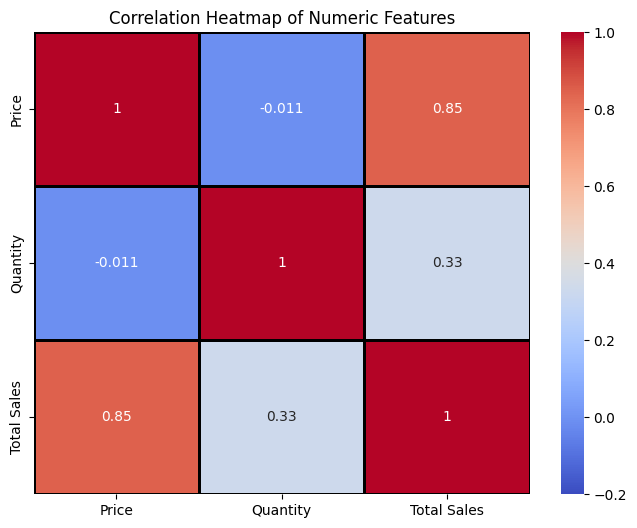

In [36]:
columns = ['Price','Quantity','Total Sales']
plt.figure(figsize=(8, 6))
plt.title('Correlation Heatmap of Numeric Features')
sns.heatmap(data= df[columns].corr(), annot= True, cmap= 'coolwarm', vmin= -0.2, linewidths= 2, linecolor= 'Black')

Text(0.5, 1.02, 'Pair Plot of Numeric Variables')

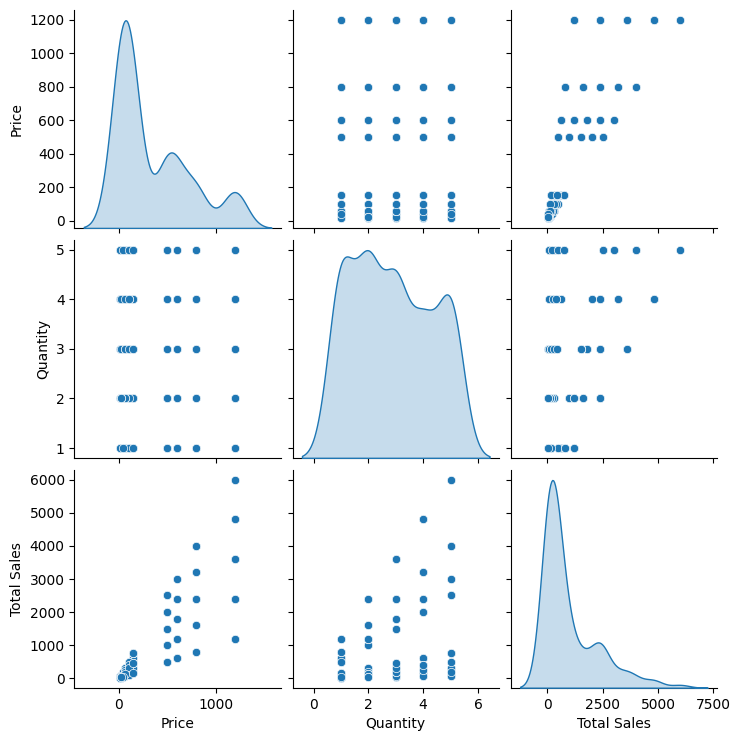

<Figure size 800x600 with 0 Axes>

In [37]:
sns.pairplot(data= df[columns], diag_kind= 'kde')
plt.figure(figsize=(8, 6))
plt.suptitle('Pair Plot of Numeric Variables', y= 1.02)

<Axes: ylabel='Count'>

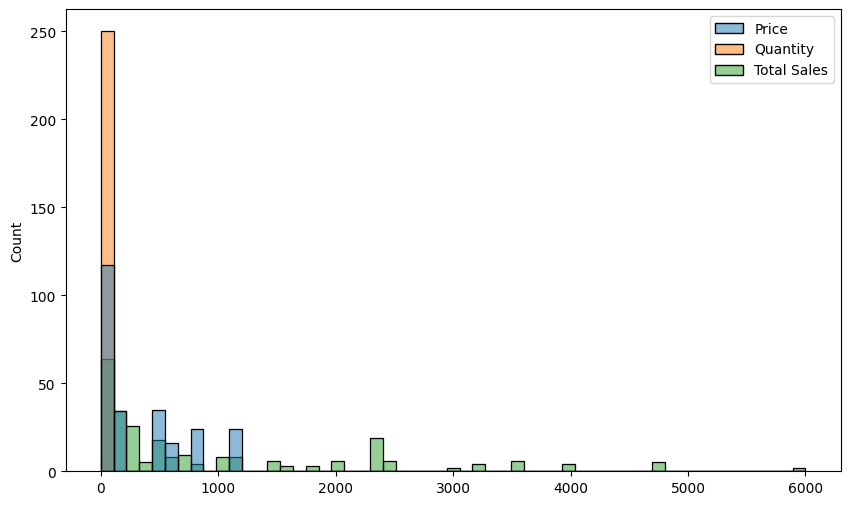

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data= df)

<Axes: >

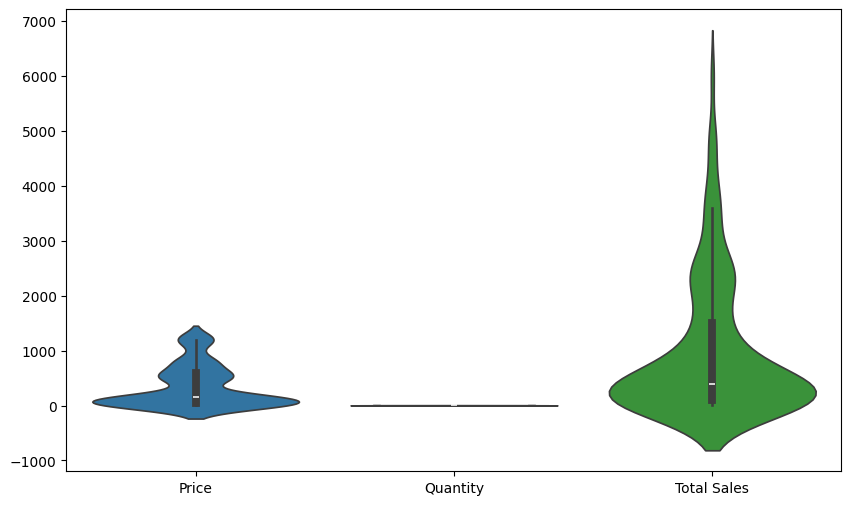

In [39]:
plt.figure(figsize=(10, 6))
sns.violinplot(data= df)

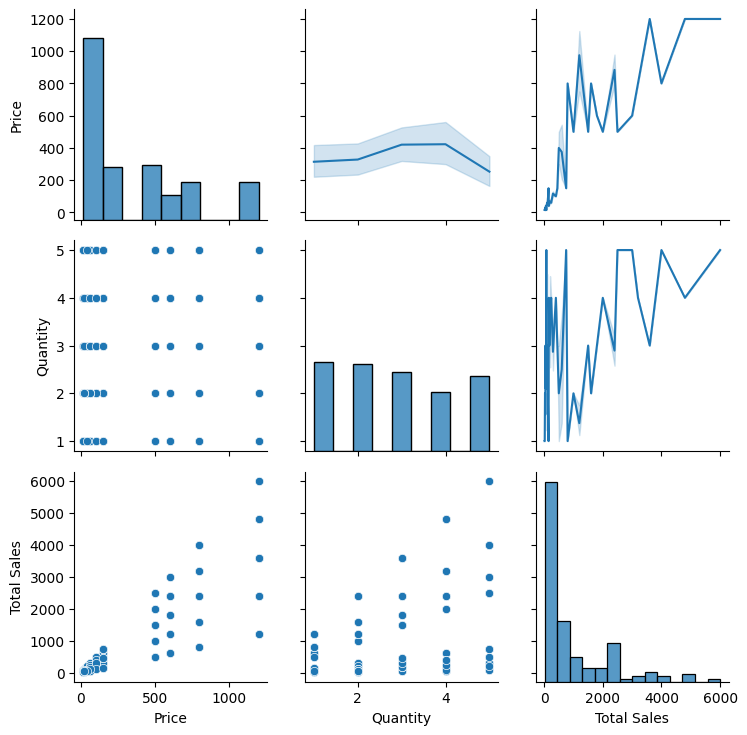

In [40]:
graph = sns.PairGrid(data= df[columns], palette= 'Set2')
graph.map_upper(sns.lineplot)
graph.map_lower(sns.scatterplot)
graph.map_diag(sns.histplot)